In [1]:
# Import des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import du jeu de données
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values.astype(float)  # Caractéristiques
y = dataset.iloc[:, 2:3].values.astype(float)    # Variable cible

In [2]:
# Mise à l'échelle des caractéristiques et de la variable cible
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

In [3]:

# Ajustement du modèle de régression par vecteurs de support (SVR) sur l'ensemble de données
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

# Prédiction d'un nouveau résultat
new_data_point = np.array([[6.5]])  # Nouvelle donnée à prédire
scaled_new_data_point = sc_X.transform(new_data_point)  # Mise à l'échelle de la nouvelle donnée
scaled_prediction = regressor.predict(scaled_new_data_point)  # Prédiction mise à l'échelle
predicted_salary = sc_y.inverse_transform(scaled_prediction.reshape(-1, 1)).flatten()  # Transformation inverse de la prédiction
print("Predicted Salary:", predicted_salary)

Predicted Salary: [170370.0204065]


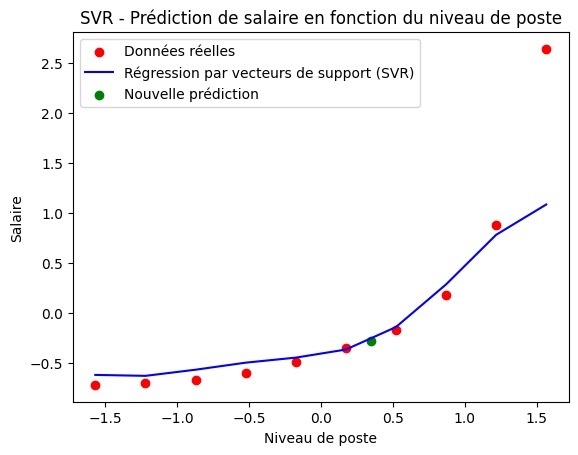

In [4]:

# Visualisation des résultats
plt.scatter(X, y, color='red', label='Données réelles')
plt.plot(X, regressor.predict(X), color='blue', label='Régression par vecteurs de support (SVR)')
plt.scatter(scaled_new_data_point, scaled_prediction, color='green', label='Nouvelle prédiction')
plt.title('SVR - Prédiction de salaire en fonction du niveau de poste')
plt.xlabel('Niveau de poste')
plt.ylabel('Salaire')
plt.legend()
plt.show()